In [30]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
from PIL import Image

In [32]:
%matplotlib inline

In [33]:
def dim(img):
    row, col, _ = img.shape
    print("Pixels: {} * {}".format(row, col))
    
def approx(U, S, V):
	return np.dot(U, np.dot(np.diag(S), V))

def rgb(img):
    return img[:,:, 0], img[:,:, 1], img[:,:, 2]

In [34]:
def compress(img, k):
    
    row, col, _ = img.shape
    
    # Separacao dos canais RGB
    img_r = img[:,:, 0]
    img_g = img[:,:, 1] 
    img_b = img[:,:, 2]
    
    U_r, S_r, V_r = np.linalg.svd(img_r, full_matrices=True)
    U_g, S_g, V_g = np.linalg.svd(img_g, full_matrices=True)
    U_b, S_b, V_b = np.linalg.svd(img_b, full_matrices=True)
    
    # Selecao dos k-primeiros valores singulares 
    U_r_k = U_r[:, 0:k]
    V_r_k = V_r[0:k, :]
    U_g_k = U_g[:, 0:k]
    V_g_k = V_g[0:k, :]
    U_b_k = U_b[:, 0:k]
    V_b_k = V_b[0:k, :]

    S_r_k = S_r[0:k]
    S_g_k = S_g[0:k]
    S_b_k = S_b[0:k]
       
    # Reconstrucao usando uma aproximacao k-rank da imagem
    img_r_k = np.dot(U_r_k, np.dot(np.diag(S_r_k), V_r_k))
    img_g_k = np.dot(U_g_k, np.dot(np.diag(S_g_k), V_g_k))
    img_b_k = np.dot(U_b_k, np.dot(np.diag(S_b_k), V_b_k))
    
    img_reconst = np.zeros((row, col, 3))
    img_reconst[:, :, 0] = img_r_k
    img_reconst[:, :, 1] = img_g_k
    img_reconst[:, :, 2] = img_b_k
    
    img_reconst[img_reconst < 0] = 0
    img_reconst[img_reconst > 1] = 1
    
    original_bytes = img.nbytes
    #print("The space (in bytes) needed to store this image is {}".format(original_bytes))

    bytes_to_be_stored = sum([m.nbytes for m in [U_r, S_r, V_r , U_g, S_g, V_g , U_b, S_b, V_b]])
    #print("The space (in bytes) needed to store all matrices is {}".format(bytes_to_be_stored))

    compressed_bytes = sum([m.nbytes for m in [U_r_k, V_r_k, U_g_k, V_g_k, U_b_k, V_b_k, S_r_k, S_g_k, S_b_k]])
    #print("The space (in bytes) needed to store compressed matrices is {}".format(compressed_bytes))

    ratio = 100 * (compressed_bytes / original_bytes)
    #print("The compression ratio is {}%".format(ratio))
    
    return img_reconst, ratio

# SVD

Sejam $m$ e $n$ as dimensões de uma matriz  $A \in \mathbb{R}^{m \times n}$, então a decomposição em valores singulares de $A$ é dada na forma abaixo.

\begin{equation}
    A = U \Sigma V^T
\end{equation}
    
- $U \in \mathbb{R}^{m \times m}$ e $V \in \mathbb{R}^{n \times n}$ são matrizes ortogonais de vetores singulares de $A$
- $\Sigma = \mbox{diag}(\sigma_1, \ldots, \sigma_r)$ é matriz diagonal
- $\sigma_1 \geq \sigma_2 \ldots \geq \sigma_r \geq 0$ são os valores singulares de $A$

## Preto-e-branco

In [35]:
img = Image.open('data/cat.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

#plt.imshow(imgmat, cmap='gray')

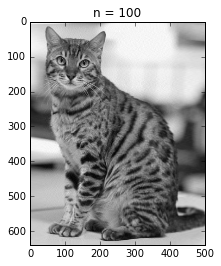

In [45]:
U, S, V = np.linalg.svd(imgmat)

fig = plt.figure()
    
for i in range(5, 101, 5):
    
    reconstimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])   
    plt.imshow(reconstimg, cmap='gray')
    
    plt.title("n = {}".format(i))
    #fig.savefig("data/gray{}.png".format(i))

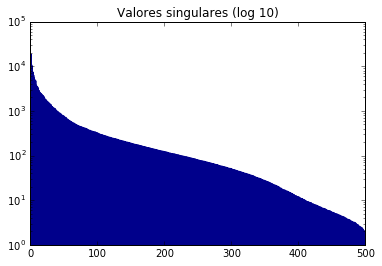

In [68]:
fig = plt.figure()

plt.plot(np.diag(S), color='darkblue')
#plt.semilogx(np.diag(S), basex=10, color='darkblue', linewidth = 0.5)
plt.yscale('log', nonposy='clip')
plt.title('Valores singulares (log 10)')
plt.show()
fig.savefig('svdlog10.png')

## Colorida

In [37]:
cat = np.array(Image.open('data/cat.jpg'))
cat = cat / 255

tiger = np.array(Image.open('data/tiger.jpg'))
tiger = tiger / 255

In [38]:
dim(cat)
dim(tiger)

Pixels: 640 * 500
Pixels: 1000 * 1600


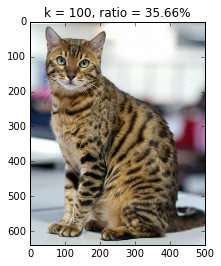

In [39]:
fig = plt.figure()
    
for i in range(5, 101, 5):
    
    cat_reconst, ratio = compress(cat, i)
    ax = fig.add_subplot(1,1,1)
    imgpplot = plt.imshow(cat_reconst)
    
    plt.title("k = {}, ratio = {:.02f}%".format(i, ratio))
    fig.savefig("data/cat{}.png".format(i))

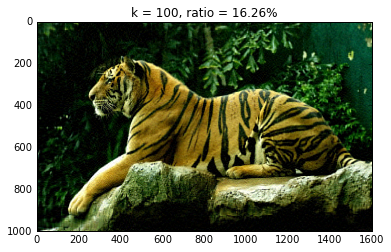

In [40]:
fig = plt.figure()
    
for i in range(5, 101, 5):
    
    tiger_reconst, ratio = compress(tiger, i)
    ax = fig.add_subplot(1,1,1)
    imgpplot = plt.imshow(tiger_reconst)
    
    plt.title("k = {}, ratio = {:.02f}%".format(i, ratio))
    fig.savefig("data/tiger{}.png".format(i))